# Lab 2. Using Pandas for data analysis

Download the US baby name dataset from [kaggle.com](https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv).

Complete the exercises for the variants. Use the formula to calculate the number of variants:
$$
N = (n + 4 ) % 5 + 1 , 
$$
where $N$ - is the number of the option, $n$ - is the number in the group list.

In [1]:
n = 16
N = (n + 4 ) % 5 + 1
f"Variant #{N}"

'Variant #1'

List of exercises for Variant # 1:

| Variant| Exercise numbers                                                   |
|:-------|:-------------------------------------------------------------------|
| 1      | 1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26 |

First, import the data for further processing.

In [2]:
import numpy as np
import pandas as pd
file_path = "NationalNames.csv"
df = pd.read_csv(file_path)
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


# Task 1
### Display the first 8 rows of the dataset.

In [3]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


# Task 2
### Display the last 8 rows of the dataset.

In [4]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


# Task 3
### Get the column names of the dataset.

In [5]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

# Task 5
### Find the number of unique names in the dataset.

Alternative approaches:

```python
df['Name'].unique().size
```

In [6]:
df['Name'].nunique()

93889

# Task 10
### Count the number of unique names in each year.

Alternative approaches:

```python
pd.DataFrame(df.groupby('Year')['Name'].nunique())
```

```python
pd.DataFrame(df.groupby('Year').Name.nunique())
```

In [7]:
df.groupby('Year').agg({'Name' : 'nunique'})

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


# Task 11
### Find the year with the largest number of unique names.

Alternative approaches:

```python
df.groupby('Year').agg({'Name' : 'nunique'}).sort_values(by=['Name'], ascending=False).head(1)
```

```python
unique_names_count_per_year = df.groupby('Year').agg({'Name' : 'nunique'})
unique_names_count_per_year.loc[unique_names_count_per_year.idxmax()]
```

In [8]:
df.groupby('Year').agg({'Name' : 'nunique'}).nlargest(1, 'Name')

,Name
Year,
2008,32488


# Task 12
### Find the most popular name in the year with the largest number of unique names (i.e. 2008).

Step 1. Find the year with the largest number of unique names.

Alternative approaches:

```python
count_unique_names_per_year = df.groupby('Year').agg({'Name' : 'nunique'})
count_unique_names_per_year.loc[count_unique_names_per_year.idxmax()].index[0]
```

In [9]:
year_with_most_unique_names = df.groupby('Year').agg({'Name' : 'nunique'}).nlargest(1, 'Name').index[0]
print(year_with_most_unique_names)

2008


Step 2. Get the data for 2008 by filtering the dataset.

Alternative approaches:

```python
df.loc[df['Year'] == year_with_most_unique_names]
```

```python
df[df['Year'] == year_with_most_unique_names]
```

In [10]:
data_for_2008 = df.query('Year == @year_with_most_unique_names')
data_for_2008.head()

,Id,Name,Year,Gender,Count
1587863,1587864,Emma,2008,F,18799
1587864,1587865,Isabella,2008,F,18603
1587865,1587866,Emily,2008,F,17421
1587866,1587867,Olivia,2008,F,17069
1587867,1587868,Ava,2008,F,17027


Step 3. Get the value of the Name column from the row with the largest value in the Count column.

Alternative approaches:

```python
data_for_2008[data_for_2008['Count'] == data_for_2008['Count'].max()]['Name'].values[0]
```

In [11]:
data_for_2008.nlargest(1, 'Count')['Name'].values[0]

'Jacob'

# Task 13
### Find the year when the name Jacob was the most popular female's name in the country.

Alternative approaches:

```python
df.query('Name == "Jacob" and Gender == "F"').sort_values(by='Count', ascending=False).head(1)
```

```python
female_jacob_rows = df.query('Name == "Jacob" and Gender == "F"')
result = female_jacob_rows.loc[female_jacob_rows['Count'].idxmax()]
```

```python
female_jacob_rows = df.query('Name == "Jacob" and Gender == "F"')
max_count_of_female_jacob = female_jacob_rows['Count'].max()
female_jacob_rows.query('Count == @max_count_of_female_jacob')
```

```python
female_jacob_rows = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
female_jacob_rows[female_jacob_rows['Count'] == female_jacob_rows['Count'].max()]
```

In [12]:
df.query('Name == "Jacob" and Gender == "F"').nlargest(1, 'Count')

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


# Task 14
### Find the year with the largest number of gender-neutral names (same male and female names).

Step 1. Find all the gender-neutral names.

Alternative approaches:

```python
gender_neutral_names = df.groupby(['Year', 'Name']).agg({'Gender' : 'nunique'}).query('Gender > 1')
```

```python
number_of_unique_genders_for_names = df.groupby(['Year', 'Name'])['Gender'].nunique()
gender_neutral_names = number_of_unique_genders_for_names[number_of_unique_genders_for_names > 1]
```

```python

```

In [13]:
gender_neutral_names = df.groupby(['Year', 'Name']).agg(
    Gender_count=pd.NamedAgg(column="Gender", aggfunc="nunique")
).query('Gender_count == 2')
gender_neutral_names

Gender_count
Year Name                
1880 Addie              2
     Allie              2
     Alma               2
     Alpha              2
     Alva               2
...                   ...
2014 Zyair              2
     Zyaire             2
     Zyan               2
     Zyion              2
     Zyon               2

[160653 rows x 1 columns]

Step 2. Find the number of gender-neutral names for each year.

```python
gender_neutral_name_count_per_year = gender_neutral_names.groupby('Year').count()
```

In [14]:
gender_neutral_name_count_per_year = gender_neutral_names.groupby('Year').agg(
    Gender_neutral_names=pd.NamedAgg(column="Gender_count", aggfunc="count")
)
gender_neutral_name_count_per_year

,Gender_neutral_names
Year,
1880,111
1881,105
1882,115
1883,122
1884,139
...,...
2010,2438
2011,2451
2012,2448


Step 3. Find the row containing the year with the maximum number of gender-neutral names.


```python
most_gender_neutral_name_year = gender_neutral_name_count_per_year.idxmax()
largest_gender_neutral_name_count = gender_neutral_name_count_per_year.max()
most_gender_neutral_name_data = pd.DataFrame({
    'Year': [most_gender_neutral_year], 
    'Gender_neutral_names': [largest_gender_neutral_name_count]
})
most_gender_neutral_name_data.set_index('Year', inplace=True)
```

In [15]:
gender_neutral_name_count_per_year.nlargest(1, 'Gender_neutral_names')

,Gender_neutral_names
Year,
2008,2557


# Task 15
### Find the total number of births in a year.

Alternative approaches:

```python
pd.DataFrame(df.groupby('Year')['Count'].sum())
```

In [16]:
df.groupby(['Year']).agg({'Count':'sum'})

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
...,...
2010,3686589
2011,3646730
2012,3643336


# Task 16
### Find the year when the most children were born.

Alternative approaches:

```python
birth_rate_per_year = pd.DataFrame(df.groupby('Year')['Count'].sum())
sums.loc[sums['Count'] == birth_rate_per_year['Count'].max()].iat[0, 0].item()
```

```python
pd.DataFrame(df.groupby('Year')['Count'].sum()).idxmax().item()
```

```python
df.groupby('Year').agg({'Count':'sum'}).nlargest(1, 'Count').reset_index().at[0, 'Year'].item()
```

```python
df.groupby('Year').agg({'Count':'sum'}).nlargest(1, 'Count').reset_index().iloc[0]['Year'].item()
```

In [17]:
df.groupby(['Year']).agg({'Count':'sum'}).idxmax().item()

1957

# Task 17
### Find the number of girls and boys born each year.

Alternative approaches:

```python
df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)
```

```python
gender_births_per_year = df.groupby(['Year', 'Gender']).agg({'Count': 'sum'}).unstack(fill_value=0)
gender_births_per_year.columns = gender_births_per_year.columns.droplevel()
```


In [18]:
df.pivot_table(index='Year', columns='Gender', values='Count', aggfunc='sum')

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


# Task 18
### Count the number of years when girls were born more than boys.

Alternative approaches:

```python
births_by_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)
(births_by_gender['F'] > births_by_gender['M']).sum().item()
```

```python
births_by_gender = df.groupby(['Year', 'Gender']).agg({'Count': 'sum'}).unstack(fill_value=0)
births_by_gender.columns = births_by_gender.columns.droplevel()
(births_by_gender['F'] > births_by_gender['M']).sum().item()
```

```python
births_by_gender = df.groupby(['Year', 'Gender']).agg({'Count': 'sum'}).unstack(fill_value=0)
births_by_gender[births_by_gender['F'] > births_by_gender['M']].shape[0]
```


In [19]:
df.pivot_table(index='Year', columns='Gender', values='Count', aggfunc='sum').query('F > `M`').shape[0]

54

# Task 21
### Count how many times the boys were called Barbara.

Alternative approaches:

```python
df.loc[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum().item()
```

```python
df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum().item()
```

```python
df[(df['Name'].isin(['Barbara'])) & (df['Gender'].isin(['M']))].Count.sum().item()
```


In [20]:
df.query('Name == "Barbara" and Gender == "M"')['Count'].sum().item()

4139

# Task 22
### Calculate the number of years of observation.

Alternative approaches:

```python
df['Year'].unique().size
```

```python
df.groupby('Year').ngroups
```

```python
df['Year'].value_counts().shape[0]
```


In [21]:
f"Observation was conducted for {df['Year'].nunique()} years"

'Observation was conducted for 135 years'

# Task 23
### Find the most popular gender-neutral names (those that are present every year).

Step 1. Find all gender-neutral names with the count of their owners.

In [22]:
neutral_gender_names = df.groupby(['Name', 'Year']).agg(
    Gender_count=('Gender', 'nunique'),
    Total=('Count', 'sum')
).query('Gender_count == 2').reset_index()
neutral_gender_names

,Name,Year,Gender_count,Total
0,Aaden,2009,2,1272
1,Aadi,2006,2,74
2,Aadi,2012,2,61
3,Aadi,2013,2,76
4,Aadyn,2008,2,65
...,...,...,...,...
160648,Zyon,2013,2,163
160649,Zyon,2014,2,142
160650,Zyree,2007,2,13
160651,Zyree,2008,2,15


Step 2. Calculate the number of years of observation.

In [23]:
observation_count = df['Year'].nunique()
observation_count

135

Step 3. Find each year's most popular gender-neutral names sorted in descending order of popularity.

In [24]:
most_populat_neutral_gender_names = neutral_gender_names.groupby('Name').agg(
    Year_count=('Year', 'nunique'),
    Total=('Total', 'sum')
).query('Year_count == @observation_count').sort_values(by=['Total'], ascending=False).reset_index()
most_populat_neutral_gender_names

,Name,Year_count,Total
0,James,135,5129096
1,John,135,5106590
2,Robert,135,4816785
3,William,135,4071368
4,Joseph,135,2580687
5,Jean,135,480901
6,Jesse,135,421406
7,Leslie,135,376587
8,Francis,135,312147
9,Lee,135,291691


Step 4. Get a list of gender-neutral names as a frame.

In [25]:
most_populat_neutral_gender_names['Name'].to_frame(name='0')

,0
0,James
1,John
2,Robert
3,William
4,Joseph
5,Jean
6,Jesse
7,Leslie
8,Francis
9,Lee


# Task 24
### Find the most popular among the unpopular names (the unpopular name that was given to children the most times).

Alternative approaches:

```python
most_popular_unpopular_name = df.nsmallest(1, 'Count', keep='all').groupby('Name').agg({'Count' : 'sum'}).nlargest(1, 'Count').reset_index()
name = most_popular_unpopular_name.iat[0,0]
count = most_popular_unpopular_name.iat[0,1].item()
```

```python
most_popular_unpopular_name = df.nsmallest(1, 'Count', keep='all').groupby('Name')['Count'].sum().sort_values(ascending=False).head(1)
name = most_popular_unpopular_name.index.item()
count = most_popular_unpopular_name.values[0].item()
```

```python
most_popular_unpopular_name = df.nsmallest(1, 'Count', keep='all').groupby('Name').agg({'Count' : 'sum'})
name = most_popular_unpopular_name.idxmax().item()
count = most_popular_unpopular_name.at[name, 'Count'].item()
```

Step 1. Find the most popular name among the unpopular names.

In [26]:
most_popular_unpopular_name = df.nsmallest(1, 'Count', keep='all').groupby('Name').agg({'Count' : 'sum'}).nlargest(1, 'Count')
most_popular_unpopular_name

,Count
Name,
Celester,160


Step 2. Generate an output string.

In [27]:
name = most_popular_unpopular_name.index[0]
count = most_popular_unpopular_name['Count'].values[0]
f'The most popular of the unpopular names is {name}. It was given {count} times.'

'The most popular of the unpopular names is Celester. It was given 160 times.'

# Task 26
### Plot the number of female names John and male names Mary by year.

Step 1. Get a data sample by year, where Name is "John" and Gender is "M".

In [28]:
john_female_name_per_year = (
    df.query('Name == "John" and Gender == "F"')
    .pivot_table(index='Year', columns='Name', values='Count', aggfunc='sum', dropna=False, fill_value='0')
)
john_female_name_per_year

Name,John
Year,
1880,46
1881,26
1882,40
1883,40
1884,40
...,...
2010,10
2011,21
2012,11


Step 2. Get a data sample by year, where Name is "Mary" and Gender is "F".

In [29]:
mary_male_name_per_year = (
    df.query('Name == "Mary" and Gender == "M"')
    .pivot_table(index='Year', columns='Name', values='Count', aggfunc='sum', dropna=False, fill_value='0')
)
mary_male_name_per_year

Name,Mary
Year,
1880,27
1881,29
1882,30
1883,32
1884,36
...,...
2005,10
2006,10
2007,10


Step 3. Merge the received data frames into one by index.

Alternative approaches:

```python
combined_data = (
    john_female_name_per_year
    .merge(mary_male_name_per_year, how='outer', on='Year')
    .fillna(0)
    .astype({'John': 'int', 'Mary': 'int'})
)
```

In [30]:
joined_data = (
    john_female_name_per_year
    .join(mary_male_name_per_year, how='outer')
    .fillna(0)
    .astype({'John': 'int', 'Mary': 'int'})
)
joined_data

Name,John,Mary
Year,,
1880,46,27
1881,26,29
1882,40,30
1883,40,32
1884,40,36
...,...,...
2010,10,0
2011,21,0
2012,11,6


Step 4. Plot a graph with the obtained data.

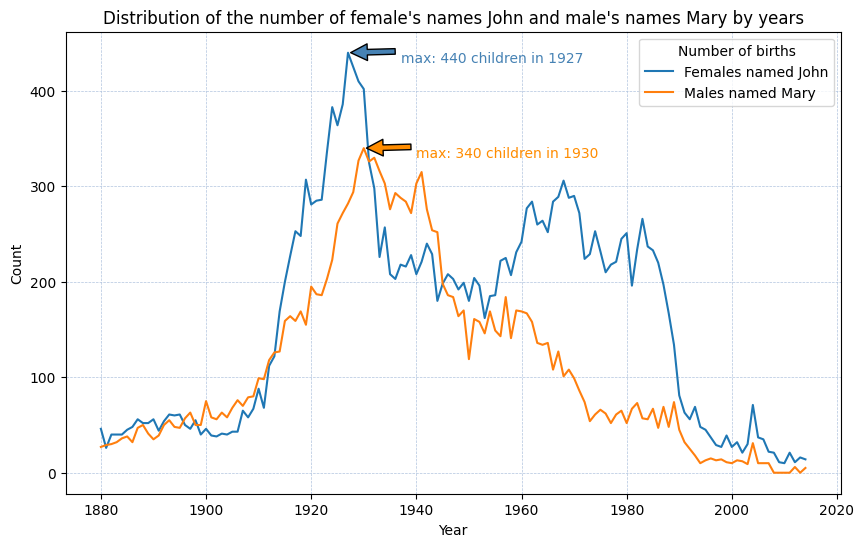

In [31]:
import matplotlib.pyplot as plt

ax = joined_data.plot(
    kind='line',
    figsize=(10, 6),
    title="Distribution of the number of female's names John and male's names Mary by years",
    xlabel="Year",
    ylabel="Count",
    legend=True,
    grid=True
)

plt.grid(
    color='lightsteelblue', 
    linestyle='--', 
    linewidth=0.5
)

plt.legend(loc='upper right', 
           title='Number of births',
          labels=['Females named John', 'Males named Mary'])

john_female_max_count = john_female_name_per_year.max().item()
john_female_max_year = john_female_name_per_year.idxmax().item()

plt.annotate(f'max: {john_female_max_count} children in {john_female_max_year}',
                 xy=(john_female_max_year, 
                     john_female_max_count),
                 xytext=(john_female_max_year + 10, 
                         john_female_max_count - 10),
                 arrowprops=dict(facecolor='steelblue',
                                 shrink=0.05),
                 annotation_clip=False,
                 color='steelblue')

mary_male_max_count = mary_male_name_per_year.max().item()
mary_male_max_year = mary_male_name_per_year.idxmax().item()

plt.annotate(f'max: {mary_male_max_count} children in {mary_male_max_year}',
                 xy=(mary_male_max_year,
                     mary_male_max_count),
                 xytext=(mary_male_max_year + 10,
                         mary_male_max_count - 10),
                 arrowprops=dict(facecolor='darkorange',
                                 shrink=0.05),
                 annotation_clip=False,
                 color='darkorange')

plt.savefig('distribution_of_female_john_and_male_mary.png')